In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Import Movies Dataset
Movies = pd.read_csv("movies.dat",sep="::",names=["MovieID","Title","Genres"],engine='python')
Movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Import Ratings Dataset
Ratings = pd.read_csv("ratings.dat",sep="::",names=["UserID","MovieID","Rating","Timestamp"],engine='python')
Ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
# Import Users Dataset
Users = pd.read_csv("users.dat",sep="::",names=["UserID","Gender","Age","Occupation","Zip-code"],engine='python')
Users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


## Create a new Master_Data set

In [5]:
MovieRatings = Movies.merge(Ratings,on='MovieID',how='inner')
MovieRatings.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [6]:
# to check whether merging does not changes any dataset
MovieRatings.shape

(1000209, 6)

In [25]:
Master = MovieRatings.merge(Users,on="UserID",how='inner')
Master.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [24]:
Master.isnull().sum()

MovieID       0
Title         0
Genres        0
UserID        0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [8]:
Master.to_csv("Master.csv") # save file as a csv format

### Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
1. User Age Distribution
2. User rating of the movie “Toy Story”
3. Top 25 movies by viewership rating
4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

##### User Age Distribution

In [9]:
# Users with Different Age Groups
Master['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

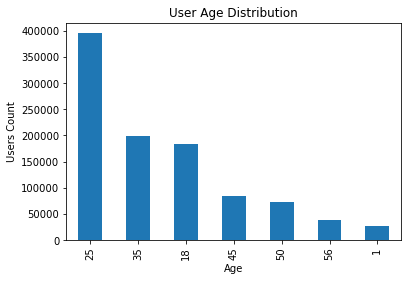

In [10]:
# Plot for users with different age groups
Master['Age'].value_counts().plot(kind='bar')
plt.xlabel("Age")
plt.title("User Age Distribution")
plt.ylabel('Users Count')
plt.show()

##### User rating of the movie “Toy Story”

In [11]:
TSRating=Master[Master['Title'].str.contains('Toy Story')==True]
TSRating

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
50,3114,Toy Story 2 (1999),Animation|Children's|Comedy,1,4,978302174,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
...,...,...,...,...,...,...,...,...,...,...
998988,3114,Toy Story 2 (1999),Animation|Children's|Comedy,3023,4,970471948,F,25,7,92108
999027,3114,Toy Story 2 (1999),Animation|Children's|Comedy,5800,5,958015250,M,35,18,90804
999486,3114,Toy Story 2 (1999),Animation|Children's|Comedy,2189,4,974607816,M,1,10,60148
999869,3114,Toy Story 2 (1999),Animation|Children's|Comedy,159,4,989966944,F,45,0,37922


In [12]:
TSRating.groupby(["Title","Rating"]).size()

Title               Rating
Toy Story (1995)    1          16
                    2          61
                    3         345
                    4         835
                    5         820
Toy Story 2 (1999)  1          25
                    2          44
                    3         214
                    4         578
                    5         724
dtype: int64

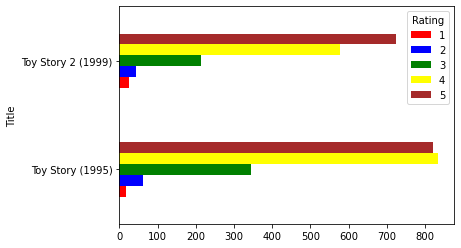

In [13]:
TSRating.groupby(["Title","Rating"]).size().unstack().plot(kind='barh',color=['red','blue','green','yellow','brown'],stacked=False,legend=True)
plt.show()

##### Top 25 movies by viewership rating

In [14]:
Top25movies = Master.groupby('Title').size().sort_values(ascending=False)[:25]
Top25movies

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

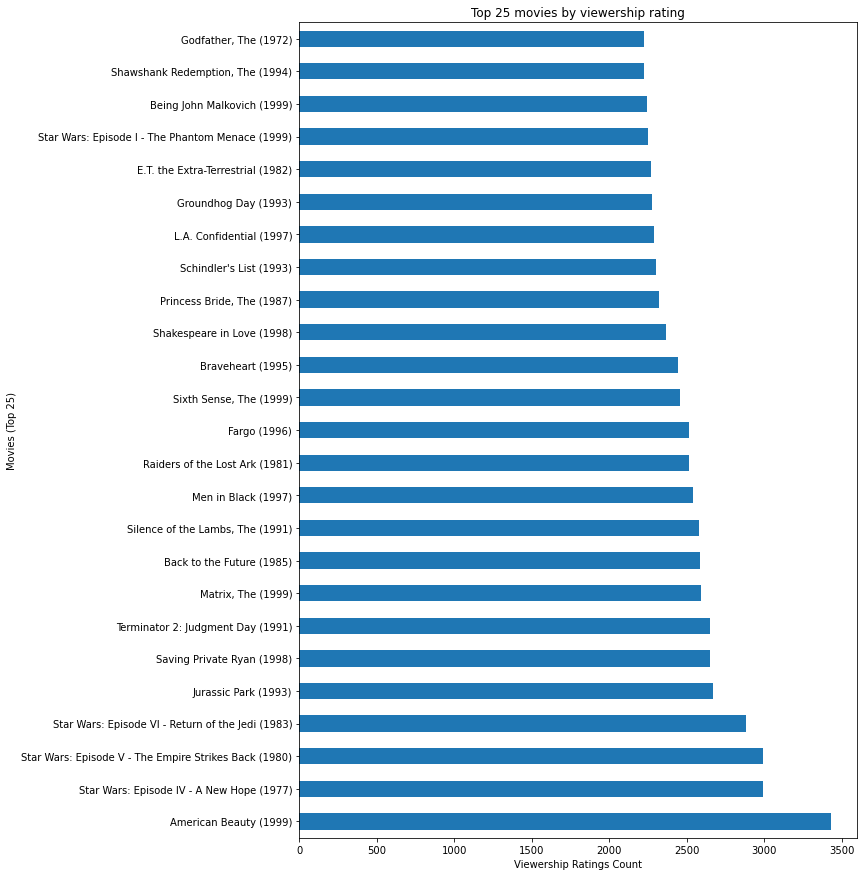

In [28]:
Top25movies.plot(kind='barh',figsize=(10,15))
plt.title("Top 25 movies by viewership rating")
plt.xlabel("Viewership Ratings Count")
plt.ylabel("Movies (Top 25)")
plt.show()

##### Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [16]:
userId = 2696
userRatingById = Master[Master["UserID"] == userId]
userRatingById

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


In [17]:
userRatingById.count


<bound method DataFrame.count of         MovieID                                           Title  \
991035      350                              Client, The (1994)   
991036      800                                Lone Star (1996)   
991037     1092                           Basic Instinct (1992)   
991038     1097               E.T. the Extra-Terrestrial (1982)   
991039     1258                             Shining, The (1980)   
991040     1270                       Back to the Future (1985)   
991041     1589                                 Cop Land (1997)   
991042     1617                        L.A. Confidential (1997)   
991043     1625                                Game, The (1997)   
991044     1644          I Know What You Did Last Summer (1997)   
991045     1645                    Devil's Advocate, The (1997)   
991046     1711  Midnight in the Garden of Good and Evil (1997)   
991047     1783                                 Palmetto (1998)   
991048     1805              

### Feature Engineering

###### 1.Find out all the unique genres
(Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

In [18]:
Genres = Master['Genres'].str.split("|")
Genres

0                    [Animation, Children's, Comedy]
1          [Animation, Children's, Musical, Romance]
2                                            [Drama]
3               [Action, Adventure, Fantasy, Sci-Fi]
4                                       [Drama, War]
                             ...                    
1000204                            [Drama, Thriller]
1000205                   [Comedy, Horror, Thriller]
1000206                            [Comedy, Romance]
1000207                           [Action, Thriller]
1000208                              [Action, Drama]
Name: Genres, Length: 1000209, dtype: object

In [19]:
listGenres = set()
for genre in Genres:
    listGenres = listGenres.union(set(genre))
listGenres    

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

##### Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.

In [20]:
ratingsOneHotEncode = Master['Genres'].str.get_dummies("|")

ratingsOneHotEncode.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [21]:
Master.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [22]:
Master.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code'],
      dtype='object')

In [29]:
Master.to_csv("Final_Master.csv")

KeyboardInterrupt: 

### Determine the features affecting the ratings of any particular movie.

In [ ]:
Master[["title","Year"]] = Master.Title.str.extract("(.)\s\((.\d+)",expand=True)

In [ ]:
aster = Master.drop(columns=["title"])
Master.head()

In [ ]:
Master.info()

In [ ]:
Master['Year'] = Master.Year.astype(int)


In [ ]:
Master['Movie_Age'] = 2000 - Master.Year

In [ ]:
Master.head()

In [ ]:
Master['Gender'] = Master.Gender.str.replace('F','1')


In [ ]:
Master['Gender'] = Master.Gender.str.replace('M','0')

In [ ]:
Master['Gender'] = Master.Gender.astype(int)

In [ ]:
Master.head()

In [ ]:
GenderAffecting = Master.groupby('Gender').size().sort_values(ascending=False)[:25]

In [ ]:
GenderAffecting

In [ ]:
Master.groupby(["Gender","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

In [ ]:
Master.groupby(["Age","Rating"]).size().unstack().plot(kind='bar', stacked=False, legend=True)

In [ ]:
Master.groupby(['Occupation','Rating']).size().unstack().plot(kind='bar',stacked=False,legend=True)

In [ ]:
Master.groupby(["Movie_Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

####  Develop an appropriate model to predict the movie ratings

In [ ]:
#First 500 extracted records
first_500 = Master[:500]
first_500

In [ ]:
#Use the following features:movie id,age,occupation
features = first_500[['MovieID','Age','Occupation']].values
features

In [ ]:
#Use rating as label
labels = first_500[['Rating']].values
labels

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Create train and test data set
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

In [ ]:
train

In [ ]:
test

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest